### **Content License Agreement**

<font color='red'><b>**WARNING**</b></font> : 본 자료는 삼성청년SW·AI아카데미의 컨텐츠 자산으로, 보안서약서에 의거하여 어떠한 사유로도 임의로 복사, 촬영, 녹음, 복제, 보관, 전송하거나 허가 받지 않은 저장매체를 이용한 보관, 제3자에게 누설, 공개 또는 사용하는 등의 무단 사용 및 불법 배포 시 법적 조치를 받을 수 있습니다.

### **Objectives**


1. **과제명**: 데이터 EDA 및 모델 학습

2. **핵심 주제**
  - 탐색적 데이터 분석(EDA)을 통한 데이터 이해
  - 전처리(결측치 처리, 이상치 제거, 인코딩, 스케일링) 워크플로우
  - 머신러닝 모델 학습·평가

3. **학습 목표**
  - `pandas`와 `seaborn`을 이용해 데이터셋을 로딩하고 결측치·이상치를 탐색한다.
  - `SimpleImputer`, `OneHotEncoder`, `StandardScaler` 등을 활용해 수치형·범주형 데이터를 적절히 전처리한다.
  - train/test 분할과 교차검증을 통해 모델 일반화 성능을 평가한다.
  - `LinearRegression` 모델을 학습하고 RMSE, MAE, R² 지표로 성능을 측정한다.

4. **학습 개념**
  - **IQR(Interquartile Range)** : 사분위 범위를 이용해 이상치 경계를 정의하는 방법
  - **One-hot Encoding** : 범주형 변수를 이진 벡터 형태로 변환하는 기법
  - **SimpleImputer** : 평균·최빈값 등으로 결측치를 자동 대체하는 전처리 클래스
  - **StandardScaler** : 평균 0, 분산 1로 특성 값을 표준화하는 스케일러
  
5. **학습 방향**
  - 데이터 로딩 및 EDA: seaborn의 내장 mpg 데이터셋을 불러와 pandas로 기초 통계와 시각화 수행
  - 전처리 파이프라인: 결측치 대체(SimpleImputer), 이상치 필터링(IQR), 범주형 인코딩(OneHotEncoder), 스케일링(StandardScaler)
  - 모델 학습·평가: train/test 분할, 교차검증(cross_val_score) 기반 LinearRegression 학습 및 성능 지표 산출

6. **데이터셋 개요 및 저작권 정보**
  - 데이터셋 명: Auto MPG dataset (mpg)
  - 데이터셋 개요: 1970~1982년 미국 출시 차량 398대의 연비(MPG)와 실린더 수, 배기량, 마력, 중량, 가속도, 모델 연도, 제조국(origin), 모델명(name) 등 9개 특성으로 구성된 공개 데이터입니다.
  - 데이터셋 저작권: 원본 데이터는 UCI Machine Learning Repository에서 퍼블릭 도메인(public domain)으로 제공되며, seaborn 라이브러리에 내장된 형태로 재배포 및 학습용 사용이 허용됩니다.


### **Prerequisites**
```
numpy>=1.26
pandas>=2.0
scikit-learn>=1.4
seaborn>=0.12
matplotlib>=3.8
```


# 1. 데이터 로딩 및 전처리 워크플로우

**학습 목표**
  - seaborn과 pandas를 이용해 mpg 데이터셋을 불러올 수 있다.
  - 결측치의 위치와 개수를 탐지하여 적절히 처리할 수 있다.
  - IQR 기반으로 수치형 이상치를 검출하고 train/test에 일관되게 적용할 수 있다.
  - 범주형 변수(origin)를 One-Hot Encoding하고 불필요한 식별자(name)를 제거할 수 있다.

**학습 개념**
  - `pandas.isna` & `DataFrame.sum`: 결측치 여부를 행·열 단위로 집계하는 메서드
  - 상관계수 히트맵: `df.corr()` + `seaborn.heatmap`
  - 시각화 함수
    - `sns.histplot`으로 타깃 분포
    - `sns.regplot`으로 수치형 변수 간 상관관계
    - `sns.lineplot`
  - IQR(Interquartile Range): 사분위수 차이를 이용해 이상치 경계를 설정하는 통계 기법
  - OneHotEncoder: sklearn 기반 범주형 변수를 이진 벡터로 변환하는 클래스
  - train/test split: 모델 일반화 성능 검증을 위해 데이터를 분리하는 표준 절차

**진행하는 실습 요약**
  - IQR을 이용해 각 수치형 컬럼의 이상치 경계 산출 → train에서 필터링 → 동일 경계를 test에 적용
  - `SimpleImputer`로 수치형 결측치 대체
  - `OneHotEncoder`로 origin 변환, name 컬럼 드롭
  - 전처리 후 train/test DataFrame 준비 완료

이번 시간에는 seaborn 내장 mpg 데이터셋을 pandas로 로드한 뒤, 결측치와 이상치를 탐지하고 핵심 변수들의 분포와 상관관계를 시각화하며 데이터의 전반적 특성을 이해합니다. 이어서 SimpleImputer, IQR 기반 필터링, OneHotEncoder를 순차적으로 적용하여 결측치 대체·이상치 제거·범주형 인코딩을 수행함으로써 머신러닝 모델 학습에 최적화된 전처리 파이프라인을 완성합니다.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

# 데이터 로드
df = sns.load_dataset("mpg")

### 🧑‍💻 **과제**: 데이터 분석하기

`mpg` 데이터셋에 대해 알아가는 시간을 가져봅시다. 기본적인 데이터의 정보를 다음 TODO를 따라가며 진행해주세요.


In [4]:
# TODO
# 1. 이 데이터셋의 총 샘플 수를 구해 `sample_count`에 담아주세요!
sample_count = len(df)

EXPECTED_SAMPLE_COUNT = 398
assert sample_count == EXPECTED_SAMPLE_COUNT, f"총 샘플 수는 {EXPECTED_SAMPLE_COUNT}이어야 합니다. (got {sample_count})"

# 2. 각 컬럼별 결측치 개수를 내림차순으로 정렬한 Series를 `missing_counts`에 담아주세요!
missing_counts = df.isnull().sum().sort_values(ascending=False)

EXPECTED_MISSING_TOP_COL = "horsepower"
EXPECTED_MISSING_TOP_CNT = 6
assert missing_counts.index[0] == EXPECTED_MISSING_TOP_COL, "결측 최다 컬럼은 horsepower여야 합니다."
assert int(missing_counts.iloc[0]) == EXPECTED_MISSING_TOP_CNT, "horsepower 결측 개수는 6이어야 합니다."
assert int(missing_counts.drop(index=[EXPECTED_MISSING_TOP_COL]).sum()) == 0, "horsepower 외 결측은 없어야 합니다."

# 3. 결측치가 하나라도 포함된 행의 수를 `rows_with_na_count`에 담아주세요!
rows_with_na_count = df.isnull().any(axis=1).sum()

EXPECTED_NA_ROWS = 6
assert rows_with_na_count == EXPECTED_NA_ROWS, f"결측 포함 행 수는 {EXPECTED_NA_ROWS}여야 합니다. (got {rows_with_na_count})"

# 4. 수치형 컬럼 목록에서 타깃 `mpg`를 제외한 예측 후보 컬럼 목록을
#    `numeric_predictors`에, 그 개수를 `numeric_feature_count`에 담아주세요!
numeric_predictors = df.select_dtypes(include=np.number).columns.tolist()
numeric_predictors.remove('mpg')
numeric_feature_count = len(numeric_predictors)

EXPECTED_NUMERIC_PREDICTORS = ['cylinders','displacement','horsepower','weight','acceleration','model_year']
assert numeric_predictors == EXPECTED_NUMERIC_PREDICTORS, f"수치형 예측 후보는 {EXPECTED_NUMERIC_PREDICTORS}여야 합니다. (got {numeric_predictors})"
assert numeric_feature_count == len(EXPECTED_NUMERIC_PREDICTORS), "수치형 예측 후보 개수가 일치하지 않습니다."

# 5. 범주형(문자/카테고리) 컬럼들의 고유값 개수를 집계한 Series를
#    인덱스 오름차순으로 정렬해 `cat_unique_counts`에 담아주세요!
cat_unique_counts = df.select_dtypes(include=['object', 'category']).nunique().sort_index()


EXPECTED_ORIGIN_LEVELS = 3
EXPECTED_NAME_UNIQUE = 305
assert "origin" in cat_unique_counts.index and "name" in cat_unique_counts.index, "origin, name 컬럼이 있어야 합니다."
assert int(cat_unique_counts["origin"]) == EXPECTED_ORIGIN_LEVELS, "origin 고유값 개수는 3이어야 합니다."
assert int(cat_unique_counts["name"]) == EXPECTED_NAME_UNIQUE, "name 고유값 개수는 305이어야 합니다."

# 6. 타깃 `mpg`의 기초 통계량(평균, 중앙값, 표준편차, 왜도)을 각각
#    `mpg_mean`, `mpg_median`, `mpg_std`, `mpg_skew`에 담아주세요!
mpg_mean = df['mpg'].mean()
mpg_median = df['mpg'].median()
mpg_std = df['mpg'].std()
mpg_skew = df['mpg'].skew()

EXP_MEAN, EXP_MEDIAN, EXP_STD, EXP_SKEW = 23.514572864, 23.0, 7.815984, 0.457
assert abs(mpg_mean - EXP_MEAN) < 1e-6, f"mpg 평균이 예상과 다릅니다. (got {mpg_mean})"
assert abs(mpg_median - EXP_MEDIAN) < 1e-6, f"mpg 중앙값이 예상과 다릅니다. (got {mpg_median})"
assert abs(mpg_std - EXP_STD) < 1e-6, f"mpg 표준편차가 예상과 다릅니다. (got {mpg_std})"
assert abs(mpg_skew - EXP_SKEW) < 1e-3, f"mpg 왜도가 예상과 다릅니다. (got {mpg_skew})"

# 7. IQR 방식으로 `mpg`의 이상치 하한/상한을 계산해 각각 `mpg_outlier_lower`, `mpg_outlier_upper`에 담고,
#    이 구간 밖 샘플 비율(%)을 `mpg_outlier_ratio`에 담아주세요!
Q1 = df['mpg'].quantile(0.25)
Q3 = df['mpg'].quantile(0.75)
IQR = Q3 - Q1
mpg_outlier_lower = Q1 - 1.5 * IQR
mpg_outlier_upper = Q3 + 1.5 * IQR
mpg_outlier_ratio = ((df['mpg'] < mpg_outlier_lower) | (df['mpg'] > mpg_outlier_upper)).sum() / len(df) * 100


EXP_LOWER, EXP_UPPER, EXP_RATIO = 0.25, 46.25, 0.2512562
assert abs(mpg_outlier_lower - EXP_LOWER) < 1e-6, f"IQR 하한이 예상과 다릅니다. (got {mpg_outlier_lower})"
assert abs(mpg_outlier_upper - EXP_UPPER) < 1e-6, f"IQR 상한이 예상과 다릅니다. (got {mpg_outlier_upper})"
assert abs(mpg_outlier_ratio - EXP_RATIO) < 1e-6, f"IQR 이상치 비율이 예상과 다릅니다. (got {mpg_outlier_ratio})"

# 8. 수치형 변수들에 대해 타깃 `mpg`와의 피어슨 상관계수를 계산하고
#    (자기 자신 제외) 절대값 기준 최댓값 특성명을 `top_corr_with_mpg`,
#    그 상관계수 값을 `top_corr_value`에 담아주세요!
corr_with_mpg = df[numeric_predictors + ['mpg']].corr()['mpg'].drop('mpg')
top_corr_with_mpg = corr_with_mpg.abs().idxmax()
top_corr_value = corr_with_mpg[top_corr_with_mpg]


EXP_TOP_CORR_FEATURE = "weight"
EXP_TOP_CORR_VALUE = -0.8317409332443347
assert top_corr_with_mpg == EXP_TOP_CORR_FEATURE, f"mpg와 절대 상관 최댓값 특성은 '{EXP_TOP_CORR_FEATURE}'여야 합니다."
assert abs(top_corr_value - EXP_TOP_CORR_VALUE) < 1e-12, f"해당 상관계수 값이 예상과 다릅니다. (got {top_corr_value})"

# 9. 수치형 전체 상관행렬을 `corr_mat`에 담고,
#    |corr| >= 0.7 인 (i, j) 쌍(대각/중복 제외)을 (이름쌍 리스트) `strong_corr_pairs`에 담아주세요!
corr_mat = df.corr(numeric_only=True)
strong_corr_pairs = []
for i in range(len(corr_mat.columns)):
    for j in range(i + 1, len(corr_mat.columns)):
        if abs(corr_mat.iloc[i, j]) >= 0.7:
            strong_corr_pairs.append((corr_mat.columns[i], corr_mat.columns[j]))

REQUIRED_PAIRS = sorted([
    ("cylinders", "displacement"),
    ("cylinders", "weight"),
    ("displacement", "horsepower"),
    ("displacement", "weight"),
    ("horsepower", "weight"),
    ("mpg", "weight"),
])
for p in REQUIRED_PAIRS:
    assert p in strong_corr_pairs, f"|corr|>=0.7 강한 상관쌍에 {p} 가 포함되어야 합니다."

# 10. 실린더 수(`cylinders`) 별 평균 `mpg`를 구해 오름차순 인덱스로 정렬한
#     Series를 `mpg_by_cylinders`에 담아주세요!
mpg_by_cylinders = df.groupby('cylinders')['mpg'].mean().sort_index()

EXPECTED_CYL_INDEX = [3, 4, 5, 6, 8]
assert list(mpg_by_cylinders.index) == EXPECTED_CYL_INDEX, "실린더 인덱스는 [3,4,5,6,8] 이어야 합니다."


# 11. `model_year`를 연도(1900+연도)로 해석해 10년 단위로 구간화한 뒤,
#     각 10년대별 평균 `mpg`를 `mpg_by_decade`에 담아주세요!
df['decade'] = (df['model_year'] + 1900) // 10 * 10
mpg_by_decade = df.groupby('decade')['mpg'].mean()


DECADES_EXPECTED = [1970, 1980]
assert list(mpg_by_decade.index) == DECADES_EXPECTED, "10년대 인덱스는 [1970, 1980]이어야 합니다."
assert mpg_by_decade.loc[1980] > mpg_by_decade.loc[1970], "1980년대 평균 mpg가 1970년대보다 커야 합니다."


print("✅ 모든 EDA 테스트를 통과했습니다!")

✅ 모든 EDA 테스트를 통과했습니다!


### 🧑‍💻 **과제**: 플롯을 통한 EDA

위에서 알게된 수치적 데이터 외에 시각적으로 데이터를 이해해봅시다. 아래 지시사항을 읽으면서 따라가주세요.


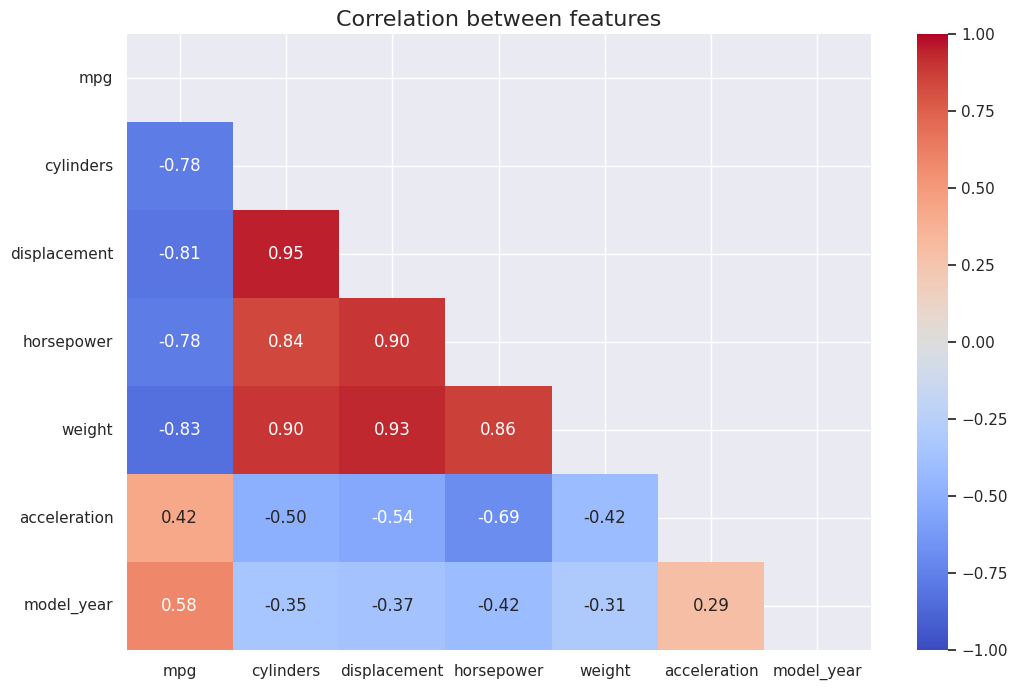

In [7]:
# TODO: 지난 실습과 마찬가지로 correlation을 그려봅시다. 아래 요구사항을 지켜주세요.
# 아래 첨부한 그림처럼 만들어주세요!
"""
요구사항
- 변수가 많습니다. Figure size를 키워주세요.
- Heatmap은 한 눈에 상관관계성을 보기에 좋습니다. 하지만 수치적으로 와닿기 위해서 어떤 조치를 취할 수 있을까요?
  - hint: annot=True
- 포맷팅을 소수점 두자리까지만 나오게 해주세요.
- colormap은 coolwarm을 사용하고 싶습니다.
  - 참고: https://seaborn.pydata.org/tutorial/color_palettes.html
- 대각행렬에는 자가 상관계수가 들어갑니다. 즉 어차피 1입니다. 제외하고 보여주세요.
- 상관계수 행렬은 대칭행렬입니다. 필요한 경우 전체 행렬을 시각화하기도 하지만, 오늘은 아래 부분만 보고 싶네요. 대각행렬을 기준으로 윗부분 제외하고 아랫부분만 보여주세요.
- 위를 날리고나니 뒤에 있는 grid가 거슬립니다. 없애주세요.
- 색깔 스케일의 범위를 -1부터 1로 지정해주세요.
"""
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1. 데이터 불러오기 및 전처리
# Seaborn에 내장된 'mpg' 데이터셋을 사용합니다.
df = sns.load_dataset('mpg')

# 히트맵에 사용할 숫자형 변수들만 선택합니다.
numeric_cols = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year']
df = df[numeric_cols]

# 결측치가 있는 행을 제거합니다. (horsepower 변수에 결측치가 있을 수 있음)
df.dropna(inplace=True)

# 2. 상관관계 행렬 계산
corr = df.corr()

# 3. 시각화를 위한 마스크 생성
# 대칭 행렬이므로 상단 삼각형 부분은 필요 없어 가려주기 위한 마스크를 생성합니다.
mask = np.triu(np.ones_like(corr, dtype=bool))

# 4. 히트맵 시각화
# Figure size를 키워줍니다.
plt.figure(figsize=(12, 8))

# Seaborn의 스타일을 설정하여 배경을 이미지와 유사하게 만듭니다.
sns.set_theme(style="darkgrid")

# Heatmap을 그립니다.
sns.heatmap(
    corr,
    annot=True,            # 각 셀에 수치 표시
    fmt='.2f',             # 소수점 둘째 자리까지 포맷팅
    cmap='coolwarm',       # 'coolwarm' 컬러맵 사용
    mask=mask,             # 상단 삼각형 가리기
    vmin=-1, vmax=1        # 색상 범위 -1 ~ 1로 지정
)

# 제목 추가
plt.title('Correlation between features', fontsize=16)

# 그래프 출력
plt.show()

참고용 Correlation Heatmap   
![image](https://github.com/1pha/image-repo/blob/main/module3/corr_hw.png?raw=true)

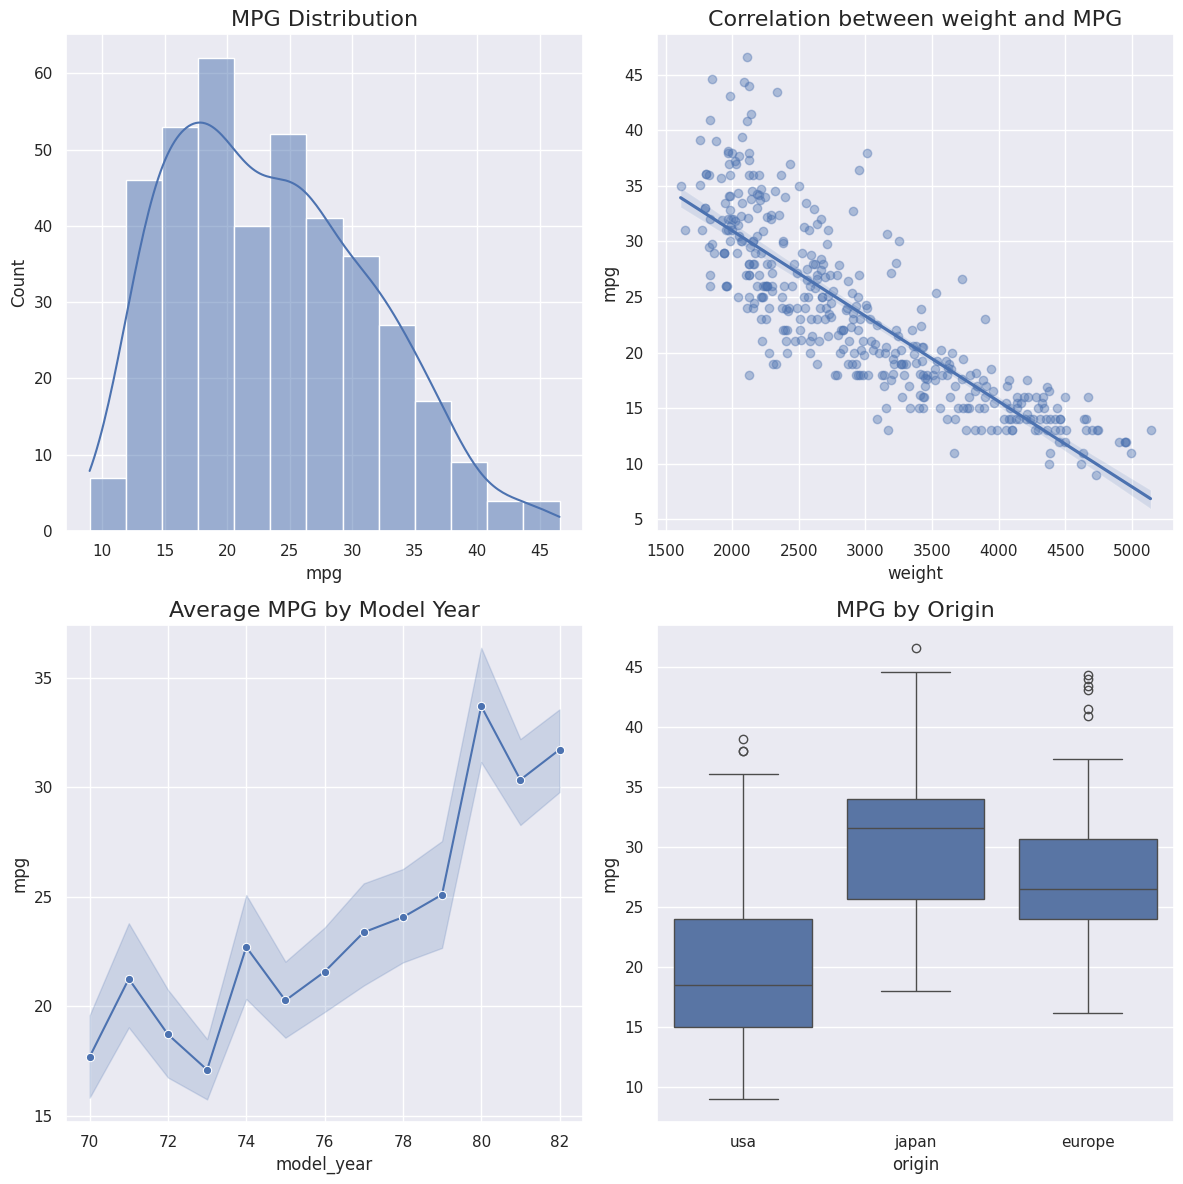

In [9]:
# # TODO: 다음 네 가지 플롯을 각각 ax[0], ax[1], ax[2], ax[3]에 넣어주세요 :)
# # https://seaborn.pydata.org/generated/seaborn.histplot.html
# fig, ax = plt.subplots(figsize=(9, 9), ncols=2, nrows=2)
# ax = ax.ravel()

# # 1. target 변수인 mpg의 도수분포표를 그려보세요.


# # 2. weight와 mpg는 어떤 상관관계를 가질까요?


# # 3. model_year에 따라 mpg는 어떻게 변화하나요?


# # 4. origin 별로 mpg의 분포에는 차이가 있을까요? boxplot으로 그려주세요.


# fig.tight_layout()
import seaborn as sns
import matplotlib.pyplot as plt

# Seaborn에 내장된 'mpg' 데이터셋을 불러옵니다.
df = sns.load_dataset('mpg')

# 2x2 서브플롯을 생성하고 크기를 조절합니다.
fig, ax = plt.subplots(figsize=(12, 12), ncols=2, nrows=2)
ax = ax.ravel() # 다차원 배열을 1차원으로 만들어 각 플롯에 쉽게 접근합니다.

# 1. target 변수인 mpg의 도수분포표 (히스토그램)
# kde=True 옵션으로 밀도 추정 곡선을 함께 표시합니다.
sns.histplot(data=df, x='mpg', kde=True, ax=ax[0])
ax[0].set_title('MPG Distribution', fontsize=16)
ax[0].set_xlabel('mpg', fontsize=12)
ax[0].set_ylabel('Count', fontsize=12)

# 2. weight와 mpg의 상관관계 (산점도 + 회귀선)
# scatter_kws={'alpha': 0.4} 옵션으로 점들의 투명도를 조절합니다.
sns.regplot(data=df, x='weight', y='mpg', ax=ax[1], scatter_kws={'alpha': 0.4})
ax[1].set_title('Correlation between weight and MPG', fontsize=16)
ax[1].set_xlabel('weight', fontsize=12)
ax[1].set_ylabel('mpg', fontsize=12)

# 3. model_year에 따른 mpg 변화 (라인 플롯)
# marker='o' 옵션으로 각 연도 데이터를 점으로 표시합니다.
sns.lineplot(data=df, x='model_year', y='mpg', ax=ax[2], marker='o')
ax[2].set_title('Average MPG by Model Year', fontsize=16)
ax[2].set_xlabel('model_year', fontsize=12)
ax[2].set_ylabel('mpg', fontsize=12)

# 4. origin(제조국) 별 mpg 분포 (박스 플롯)
sns.boxplot(data=df, x='origin', y='mpg', ax=ax[3])
ax[3].set_title('MPG by Origin', fontsize=16)
ax[3].set_xlabel('origin', fontsize=12)
ax[3].set_ylabel('mpg', fontsize=12)

# 플롯들이 겹치지 않도록 레이아웃을 자동으로 조절합니다.
fig.tight_layout()
plt.show()

참고용 Plot.     
![image](https://github.com/1pha/image-repo/blob/main/module3/histograms_hw.png?raw=true)

### 🧑‍💻 **과제**: 데이터 전처리

데이터를 잘 살펴봤다면 먼저 학습데이터와 테스트데이터를 분할한 후, 학습데이터를 기반으로 결측치와 이상치를 탐지한 후 처리해봅시다. 그리고 표준화를 진행하여 모델링을 진행해봅시다.

이번에는 결측치를 실습과 다른 방법으로 제거해봅시다. `sklearn.impute` 모듈에는 `SimpleImputer`라는 방법이 있습니다. 다음 API Reference를 한 번 읽어보고 진행해봅시다.
- https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html

`SimpleImputer`를 사용하면 어떤 장점이 있을까요? 지난 시간에 `sklearn.preprocessing.StandardScaler`를 이용하면 학습데이터의 평균/표준편차를 따로 계산하고 저장하지 않아도 메소드를 활용해 바로 테스트 데이터에 적용이 가능했습니다. `SimpleImputer`도 마찬가지로 학습데이터에 등장한 최빈값을 이용해 테스트데이터에 적용하여 데이터 누수를 방지할 수 있습니다.


In [13]:
# TODO:
# 1. Train/Test 데이터 분할
# 이번에는 y에도 결측치가 있을 수 있다고 가정하고 분할을 진행해봅시다.
# df_train, df_test에 학습/테스트 데이터를 분할해주세요
""" 요구사항
- test_size는 전체 데이터의 30%로 설정해주세요.
- 지난 번과 마찬가지로 재현가능성을 위해 난수를 고정해줍시다.
- stratify를 진행하고 싶은데, 이는 연속형 변수에서는 어렵습니다. 어떻게 진행하면 좋을까요?
  - hint: pd.qcut
"""
from sklearn.model_selection import train_test_split
# Stratify for continuous variable by converting to bins
df['mpg_bins'] = pd.qcut(df['mpg'], q=10, labels=False, duplicates='drop')

df_train, df_test = train_test_split(df, test_size=0.3, random_state=42, stratify=df['mpg_bins'])

# Drop the temporary bins column
df_train = df_train.drop('mpg_bins', axis=1)
df_test = df_test.drop('mpg_bins', axis=1)


# 2. 결측치제거
# `sklearn.impute.SimpleImputer`를 이용해서 결측치를 채워봅시다.
# SimpleImputer는 범주형과 수치형 데이터 별로 별도로 제작해야합니다.
# 그리고 학습데이터에 대해서 제작해야합니다.
from sklearn.impute import SimpleImputer

# 2-1. 수치형 결측치 채우기: `num_imputer`에 `SimpleImputer` 인스턴스를 제작해주세요.
# 수치형 데이터는 평균값으로 채워봅시다.
# 그리고 `fit_transform`을 통해 학습데이터에 대한 변환을 진행해줍니다.
# `transform`을 통해 테스트데이터에 대한 변환도 진행합니다.
numeric_cols = df_train.select_dtypes(include=np.number).columns
num_imputer = SimpleImputer(strategy='mean')
df_train[numeric_cols] = num_imputer.fit_transform(df_train[numeric_cols])
df_test[numeric_cols]  = num_imputer.transform(df_test[numeric_cols])

# 2-2. 범주형 결측치 채우기: `cat_imputer`에 `SimpleImputer` 인스턴스를 제작해주세요.
# 범주형 데이터는 최빈값으로 채워봅시다.
# 그리고 `fit_transform`을 통해 학습데이터에 대한 변환을 진행해줍니다.
# `transform`을 통해 테스트데이터에 대한 변환도 진행합니다.
categorical_cols = df_train.select_dtypes(exclude=np.number).columns
cat_imputer = SimpleImputer(strategy='most_frequent')
df_train[categorical_cols] = cat_imputer.fit_transform(df_train[categorical_cols])
df_test[categorical_cols]  = cat_imputer.transform(df_test[categorical_cols])


# 3. IQR 기반 이상치 제거 (수치형 컬럼 기준)
# 마찬가지로 데이터 누수에 주의해주세요.
# 3-1. 학습데이터셋에서의 IQR 범위를 구해서 `iqr_bounds`에 넣어주세요.
iqr_bounds = {}
for col in numeric_cols:
    Q1 = df_train[col].quantile(0.25)
    Q3 = df_train[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    iqr_bounds[col] = (lower_bound, upper_bound)

# 3-2. 위에서 구한 IQR bounds 기반으로 학습데이터에서의 IQR을 제거해주세요.
outlier_mask_train = pd.Series(True, index=df_train.index)
for col, (lower, upper) in iqr_bounds.items():
    outlier_mask_train &= (df_train[col] >= lower) & (df_train[col] <= upper)
df_train = df_train[outlier_mask_train]

# 3-3. 위에서 구한 IQR bounds 기반으로 테스트 데이터에서의 IQR을 제거해주세요.
outlier_mask_test = pd.Series(True, index=df_test.index)
for col, (lower, upper) in iqr_bounds.items():
    outlier_mask_test &= (df_test[col] >= lower) & (df_test[col] <= upper)
df_test = df_test[outlier_mask_test]

# 4. 표준화 진행
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# 5. 범주형 데이터 처리
# 지난 시간에 다룬 wine 데이터는 범주형 데이터가 존재하지 않았습니다.
# 하지만 지금처럼 `origin`과 같은 범주형 데이터는 모델이 해석할 수 없기 때문에
# 이를 숫자 형태로 "인코딩"해줘야합니다.
numeric_features = [col for col in numeric_cols if col != 'mpg']
df_train[numeric_features] = scaler.fit_transform(df_train[numeric_features])
df_test[numeric_features] = scaler.transform(df_test[numeric_features])
# 5-1. df_train.name
# name에는 총 몇 개의 고유한 값이 존재하나요? `n_unique_name`에 할당해주세요
# 전체 데이터수와 비교했을 때 비율이 어떻게 되나요? `pct_unique_name`에 할당해주세요.
n_unique_name = df_train['name'].nunique()
pct_unique_name = (n_unique_name / len(df_train)) * 100

EXPECTED_NUNIQUE_NAME = 209
assert n_unique_name == EXPECTED_NUNIQUE_NAME, (
    f"Expected {EXPECTED_NUNIQUE_NAME} unique names, got {n_unique_name}"
)
print(f"Unique names: {n_unique_name} ({pct_unique_name:.1f}% of all samples)")

# 5-2. df_train.origin
# 마찬가지로 origin에는 총 몇 개의 고유한 값이 존재하나요? `n_unique_origin`에 할당해주세요.
n_unique_origin = df_train['origin'].nunique()
NUNIQUE_ORIGIN = 3
assert n_unique_origin == NUNIQUE_ORIGIN, (
    f"Expected {NUNIQUE_ORIGIN} origin levels, got {n_unique_origin}"
)
print(f"Unique origin levels: {n_unique_origin}")

# 5-3. 범주형 데이터 인코딩
# 수치로 확인해볼 결과 name의 경우 데이터수와 비교했을 때 그 수가 너무 많아
# mpg를 예측하기에는 조금 어려움이 있어보입니다.
# 따라서 우리는 name은 사용하지 않고
# origin만 숫자로 인코딩하여 사용합시다
# `OneHotEncoder`를 활용해서 학습데이터와 테스트데이터에 `origin` 칼럼을 인코딩해서 넣어주세요.
from sklearn.preprocessing import OneHotEncoder

df_train.drop('name', axis=1, inplace=True)
df_test.drop('name', axis=1, inplace=True)

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

encoded_train = encoder.fit_transform(df_train[['origin']])
encoded_train_df = pd.DataFrame(encoded_train, columns=encoder.get_feature_names_out(['origin']), index=df_train.index)

encoded_test = encoder.transform(df_test[['origin']])
encoded_test_df = pd.DataFrame(encoded_test, columns=encoder.get_feature_names_out(['origin']), index=df_test.index)

df_train = pd.concat([df_train.drop('origin', axis=1), encoded_train_df], axis=1)
df_test = pd.concat([df_test.drop('origin', axis=1), encoded_test_df], axis=1)

print("\n--- 전처리 완료 후 학습 데이터 정보 ---")
df_train.info()
print("\n--- 전처리 완료 후 테스트 데이터 정보 ---")
df_test.info()

Unique names: 209 (81.3% of all samples)
Unique origin levels: 3

--- 전처리 완료 후 학습 데이터 정보 ---
<class 'pandas.core.frame.DataFrame'>
Index: 257 entries, 264 to 85
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   mpg            257 non-null    float64
 1   cylinders      257 non-null    float64
 2   displacement   257 non-null    float64
 3   horsepower     257 non-null    float64
 4   weight         257 non-null    float64
 5   acceleration   257 non-null    float64
 6   model_year     257 non-null    float64
 7   origin_europe  257 non-null    float64
 8   origin_japan   257 non-null    float64
 9   origin_usa     257 non-null    float64
dtypes: float64(10)
memory usage: 22.1 KB

--- 전처리 완료 후 테스트 데이터 정보 ---
<class 'pandas.core.frame.DataFrame'>
Index: 112 entries, 385 to 228
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   mpg         

### 📝 참고: 시계열 데이터에서 결측치와 이상치처리
시계열 데이터에서 결측치와 이상치 처리는 단순히 값만 채우거나 제거하는 것이 아니라 시간적 흐름을 고려해야 합니다!

1. **결측치 처리**
	-	Forward Fill (ffill): 이전 시점의 값을 그대로 채움. 주가·온도처럼 값이 급변하지 않는 경우 적합.
	-	Backward Fill (bfill): 다음 시점의 값을 사용.
	-	보간(Interpolation): 선형·다항·스플라인 보간 등으로 시계열의 추세를 반영해 채움.
	-	모델 기반 예측: ARIMA, Prophet 등 시계열 모델로 결측 구간을 예측하여 채움.

2. **이상치 처리**
	-	통계적 방법: 이동평균·이동표준편차로 정상 범위를 설정하고 벗어난 값 제거/수정.
	-	계절성 고려: 계절/주기 패턴을 분리한 뒤 잔차가 일정 기준을 넘으면 이상치로 판단.

핵심은 시간 순서를 유지하면서 결측치·이상치를 처리하는 것이며, 무작정 삭제하면 시계열 패턴이 왜곡될 수 있으니 주의가 필요합니다.


# 2: 머신러닝 모델 학습·평가 및 하이퍼파라미터 최적화
**학습 목표**
  - train/test로 분리된 데이터를 이용해 `LinearRegression` 모델을 학습할 수 있다.
  - RMSE, MAE, R² 등의 지표로 모델 성능을 정량적으로 평가할 수 있다.

**학습 개념**
  - `LinearRegression`: 앙상블 기반 회귀 모델로 다수의 결정트리를 학습해 예측 성능을 높인다
  - RMSE (Root Mean Squared Error): 제곱오차의 평균에 루트를 씌워 모델 오차를 해석하기 쉬운 단위로 표현
  - MAE (Mean Absolute Error): 절대오차 평균으로 이상치에 덜 민감한 성능 지표
  - R² (Coefficient of Determination): 예측값이 실제값 변동을 얼마나 설명하는지 비율로 나타내는 지표

**진행하는 실습 요약**
  - 기본 `LinearRegression` 인스턴스를 생성 후 `fit`, `predict` 수행
  - `mean_squared_error`, `mean_absolute_error`, `r2_score`로 테스트 세트 성능 산출


### 🧑‍💻 **과제**: 모델 학습

기초적인 선형회귀 모델로 해당 과제를 수행해봅시다!


Text(0, 0.5, 'Predicted MPG')

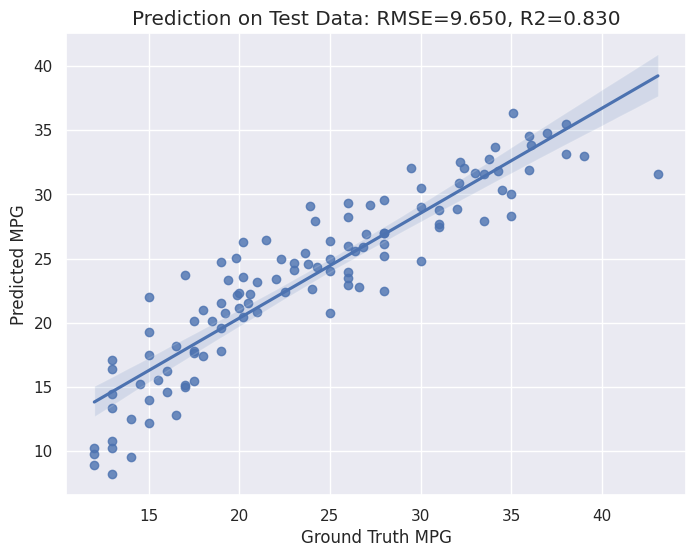

In [15]:
# TODO
# 1. X, y 나누기
# X_train, y_train, X_test, y_test를 생성해주세요
# 예측해야하는 변수는 "mpg"입니다.
X_train = df_train.drop('mpg', axis=1)
y_train = df_train['mpg']
X_test = df_test.drop('mpg', axis=1)
y_test = df_test['mpg']

# 2. LinearRegression을 `reg`에 할당하고 학습데이터에 대해 학습해주세요.
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

# 3. 테스트데이터에 대한 예측값 만들어서 `y_pred`에 할당해주세요.
y_pred = reg.predict(X_test)

# 4. 회귀 모델 평가하기
# 앞에서 여러분이 학습한 모델을 토대로 예측한 `y_pred`와 `y_true`를 통해 테스트데이터 성능을 평가합니다.
# 수정없이 사용해주세요.
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

test_rmse = mean_squared_error(y_test, y_pred)
test_mae  = mean_absolute_error(y_test, y_pred)
test_r2   = r2_score(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 6))
sns.regplot(x=y_test, y=y_pred)
ax.set_title(f"Prediction on Test Data: RMSE={test_rmse:.3f}, R2={test_r2:.3f}", size="large")
ax.set_xlabel("Ground Truth MPG")
ax.set_ylabel("Predicted MPG")

# 마치며

실제로 머신러닝 프로젝트를 진행하면, 모델을 학습시키는 멋진 나의 모습을 떠올리지만, 대부분의 프로젝트에서 데이터를 손질하고 있는 본인을 발견하실 수 있을겁니다. 오늘도 실제로 모델을 학습하고 예측하는 코드보다, 데이터 탐색과 전처리에 많은 시간을 쏟으셨을텐데요, 아무래도 데이터가 제일 위에 있다보니 앞으로도 자주 겪게되실 현상입니다 :) 오늘도 수고 많으셨습니다!

## Further Readings

- A Comprehensive Guide to Seaborn for EDA: `seaborn`으로 수행한 또다른 EDA 예시입니다. 참고하면 복습에 유용합니다.
  - https://towardsdatascience.com/exploratory-data-analysis-in-python-c9a77dfa39ce/
- Hyperparameter Optimization with Optuna and scikit-learn Pipeline: scikit-learn Pipeline과 Optuna를 결합하는 실제 코드 예시를 제시합니다. Optuna는 적절한 초매개변수를 찾기 위한 실험을 설계해주는 라이브러리로 알아두시면 좋습니다 :)
  - https://mlops.community/optuna-sklearn-pipeline

## Open-ended Mission
- **데이터 전처리 다르게 진행하기**: 데이터 전처리는 모델 성능에서 굉장히 핵심적인 역할입니다. 일부 파이프라인을 수정하면 성능이 더 잘 나올까요?
- **다른 회귀 모델 적용 및 성능 비교하기**: `sklearn.linear_model`에서 제공하는 다른 모델을 통해 학습을 진행해보세요. 성능이 더 잘 나오나요?
